#Foram Patel - 1215654

#Importing dataset of fruits and vegetables

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing necessary libraries

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#Declaring and initializing variables


In [59]:
trainingDatasetPath = "/content/drive/MyDrive/fruits_vegetables_datasets/train" #declare variable for training dataset path
validationDatasetPath = "/content/drive/MyDrive/fruits_vegetables_datasets/validation" #declare variable for validation dataset path
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Dataset preprocessing

#Training dataset preprocessing


In [60]:
trainingDataset = tf.keras.utils.image_dataset_from_directory(
    trainingDatasetPath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
#training dataset loading parameters

Found 3115 files belonging to 36 classes.


#Validation image preprocessing


In [62]:
validationDataset = tf.keras.utils.image_dataset_from_directory(
    validationDatasetPath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
#validation dataset loading parameters

Found 351 files belonging to 36 classes.


#Implementation of CNN classification algorithm

In [63]:
fvRecognizationModel = tf.keras.models.Sequential() #building cnn model #fvRecognizationModel stands for fruits&vegetables recognization model

#Building convolution layer for feature extraction and engineering

In [64]:
fvRecognizationModel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
fvRecognizationModel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
fvRecognizationModel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [65]:
fvRecognizationModel.add(tf.keras.layers.Dropout(0.25))

In [66]:
fvRecognizationModel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
fvRecognizationModel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
fvRecognizationModel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [67]:
fvRecognizationModel.add(tf.keras.layers.Dropout(0.25))

In [68]:
fvRecognizationModel.add(tf.keras.layers.Flatten())

In [69]:
fvRecognizationModel.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [70]:
fvRecognizationModel.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [71]:
fvRecognizationModel.add(tf.keras.layers.Dropout(0.5)) #To prevent overfitting

In [72]:
fvRecognizationModel.add(tf.keras.layers.Dense(units=36,activation='softmax')) #Building output layer

#Compiling and training phase of a model


In [73]:
fvRecognizationModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
fvRecognizationModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [75]:
trainingModelResults = fvRecognizationModel.fit(x=trainingDataset,validation_data=validationDataset,epochs=32,callbacks=[early_stopping])

Epoch 1/32
98/98 [==============================] - 221s 2s/step - loss: 9.5062 - accuracy: 0.0324 - val_loss: 3.5805 - val_accuracy: 0.0399
Epoch 2/32
98/98 [==============================] - 209s 2s/step - loss: 3.5541 - accuracy: 0.0475 - val_loss: 3.5716 - val_accuracy: 0.0541
Epoch 3/32
98/98 [==============================] - 222s 2s/step - loss: 3.4624 - accuracy: 0.0648 - val_loss: 3.5158 - val_accuracy: 0.0912
Epoch 4/32
98/98 [==============================] - 210s 2s/step - loss: 3.3150 - accuracy: 0.0934 - val_loss: 3.1078 - val_accuracy: 0.1624
Epoch 5/32
98/98 [==============================] - 219s 2s/step - loss: 3.1372 - accuracy: 0.1217 - val_loss: 2.7384 - val_accuracy: 0.3276
Epoch 6/32
98/98 [==============================] - 214s 2s/step - loss: 2.9333 - accuracy: 0.1705 - val_loss: 2.6285 - val_accuracy: 0.4103
Epoch 7/32
98/98 [==============================] - 215s 2s/step - loss: 2.6538 - accuracy: 0.2356 - val_loss: 1.9544 - val_accuracy: 0.6097
Epoch 8/32
98

#Evaluating model performance on the training dataset and validation dataset

In [76]:
train_loss, train_acc = fvRecognizationModel.evaluate(trainingDataset)
print('Training dataset accuracy:', train_acc)
#printing training dataset accuracy

val_loss, val_acc = fvRecognizationModel.evaluate(validationDataset)
print('Validation dataset accuracy:', val_acc)
#printing validation dataset accuracy

98/98 [==============================] - 106s 1000ms/step - loss: 0.0732 - accuracy: 0.9827
Training dataset accuracy: 0.9826645255088806
11/11 [==============================] - 14s 409ms/step - loss: 0.2606 - accuracy: 0.9487
Validation dataset accuracy: 0.9487179517745972


#Saving model accuracy and results data

In [77]:
fvRecognizationModel.save('trainedModelData.h5') #saving model results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Getting training model history

In [78]:
trainingModelResults.history #return trainingModelResults as a dictionary

{'loss': [9.506158828735352,
  3.554117202758789,
  3.4624130725860596,
  3.3149898052215576,
  3.1372013092041016,
  2.933342218399048,
  2.653799057006836,
  2.4058971405029297,
  2.0987491607666016,
  1.8448485136032104,
  1.5884158611297607,
  1.2793011665344238,
  1.1343649625778198,
  0.9768769145011902,
  0.81223464012146,
  0.7137751579284668,
  0.6208788156509399,
  0.5247687697410583,
  0.4359463155269623,
  0.41466203331947327,
  0.34851211309432983,
  0.3325170874595642,
  0.35147610306739807,
  0.33406224846839905],
 'accuracy': [0.03242375701665878,
  0.04751203954219818,
  0.06484751403331757,
  0.09341894090175629,
  0.12166934460401535,
  0.17046548426151276,
  0.23563402891159058,
  0.2991974353790283,
  0.38459068536758423,
  0.4574638903141022,
  0.5287319421768188,
  0.6234350204467773,
  0.6600320935249329,
  0.7056179642677307,
  0.7521669268608093,
  0.7874799370765686,
  0.8195826411247253,
  0.8491171598434448,
  0.867415726184845,
  0.8828250169754028,
  0.90

#Saving training data model history in JSON format

In [79]:
import json
with open('trainingModelHistory.json','w') as f:
  json.dump(trainingModelResults.history,f) #creating JSON file to get training data model results

#Calculating accuracy of model on training dataset and validation dataset

In [80]:
print("Training dataset accuracy: {} %".format(trainingModelResults.history['accuracy'][-1]*100)) #printing accuracy of training dataset
print("Validation dataset accuracy: {} %".format(trainingModelResults.history['val_accuracy'][-1]*100)) #printing accuracy of validation dataset

Training dataset accuracy: 90.88282585144043 %
Validation dataset accuracy: 95.44159770011902 %


#Accuracy visualization of the datasets

#Training dataset accuracy visualization

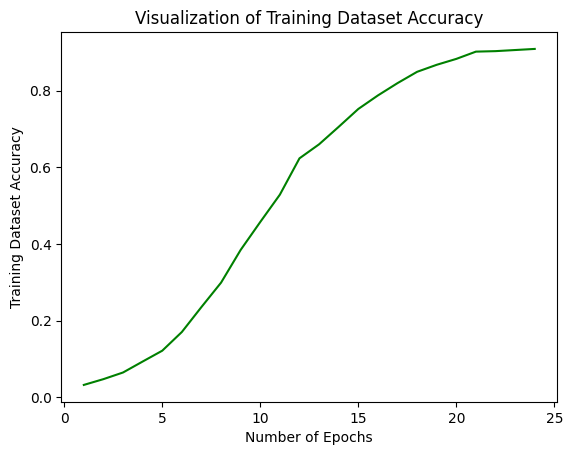

In [83]:
epochs = [i for i in range(1,25)]
plt.plot(epochs,trainingModelResults.history['accuracy'],color='green')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Dataset Accuracy')
plt.title('Visualization of Training Dataset Accuracy')
plt.show()
#Visualization of training dataset accuracy

#Validation dataset accuracy visualization

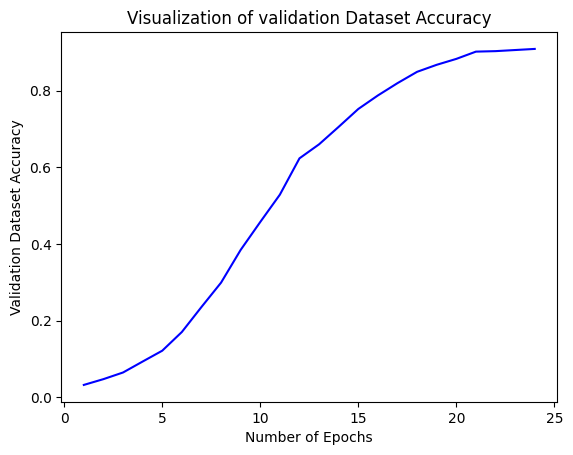

In [84]:
plt.plot(epochs,trainingModelResults.history['accuracy'],color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Dataset Accuracy')
plt.title('Visualization of validation Dataset Accuracy')
plt.show()
#Visualization of validation dataset accuracy

#Testing dataset preprocessing

In [85]:
testingDataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits_vegetables_datasets/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
#testing dataset loading parameters

Found 359 files belonging to 36 classes.


#Loading trained model for testing dataset

In [86]:
fvRecognizationModel = tf.keras.models.load_model('/content/trainedModelData.h5')

#Visualising and Performing Prediction on Single image

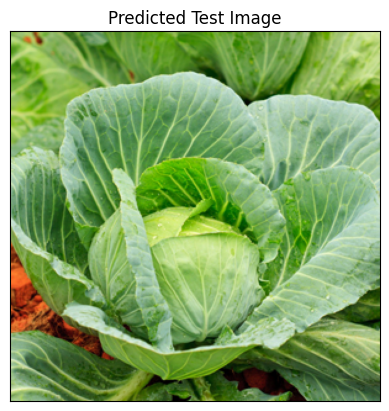

In [88]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
testingImagePath = '/content/drive/MyDrive/fruits_vegetables_datasets/test/cabbage/Image_5.jpg' #get test Image path
# Reading an image in default mode
getTestImage = cv2.imread(testingImagePath) #read test image
getTestImage = cv2.cvtColor(getTestImage,cv2.COLOR_BGR2RGB) #Converting BGR to RGB

#show predicted result of test image
plt.imshow(getTestImage)
plt.title('Predicted Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Evaluating model performance on testing dataset

In [92]:
import numpy as np
getTestImagePath = tf.keras.preprocessing.image.load_img(testingImagePath,target_size=(64,64))
testImageInputArr = tf.keras.preprocessing.image.img_to_array(getTestImagePath)
testImageInputArr = np.array([testImageInputArr])  #Convert a single test image to a batch.
testImagePrediction = fvRecognizationModel.predict(testImageInputArr)
#print(testImagePrediction)
#testingDataset.class_names
result_index = np.argmax(testImagePrediction) #get index of element
print(result_index)

#Single image Prediction
print("It's a {}".format(testingDataset.class_names))
print("It's a {}".format(testingDataset.class_names[result_index]))

1/1 [==============================] - 0s 37ms/step
4
It's a ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
It's a cabbage


#Training dataset accuracy

In [93]:
test_loss,test_acc = fvRecognizationModel.evaluate(testingDataset)
print('Testdataset accuracy:', test_acc)

12/12 [==============================] - 21s 875ms/step - loss: 0.2548 - accuracy: 0.9499
Testdataset accuracy: 0.9498607516288757
